In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [2]:
import seaborn as sns # iris 데이터 
import pandas as pd #원핫인코딩
from sklearn.preprocessing import LabelEncoder 
import tensorflow.keras.utils as utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# 문자변수 원핫인코딩 방법1
iris = sns.load_dataset('iris')
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species']) # 문자를 숫자로
iris['species'][::50]
utils.to_categorical(iris['species'])[::50]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [4]:
# 문자변수 원핫인코딩 방법2
iris = sns.load_dataset('iris')
pd.get_dummies(iris['species'])[::50]

,setosa,versicolor,virginica
0,1,0,0
50,0,1,0
100,0,0,1


In [5]:
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=file, monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1)
earlystopping = EarlyStopping(patience=40)
# 1. 데이터 셋 
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1].values # 데이터 프레임을 array로
iris_Y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_Y).to_numpy() # 데이터 프레임을 array로
 # 훈련셋 : 테스트 셋 = 8:2
train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y,
                                     test_size=0.2, random_state=1)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(units=60, input_dim=4, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
# 4. 학습
hist=model.fit(train_X,train_Y,batch_size=50,epochs=300,validation_split=0.2,
              callbacks=[checkpoint,earlystopping])


Epoch 1/300
2/2 [==============================] - 1s 169ms/step - loss: 1.6318 - accuracy: 0.2708 - val_loss: 1.1115 - val_accuracy: 0.4583

Epoch 00001: val_accuracy improved from -inf to 0.45833, saving model to ./model\iris-001-val0.4583.h5
Epoch 2/300
2/2 [==============================] - 0s 19ms/step - loss: 1.3166 - accuracy: 0.2708 - val_loss: 1.0295 - val_accuracy: 0.4583

Epoch 00002: val_accuracy did not improve from 0.45833
Epoch 3/300
2/2 [==============================] - 0s 19ms/step - loss: 1.1163 - accuracy: 0.2708 - val_loss: 1.0172 - val_accuracy: 0.3333

Epoch 00003: val_accuracy did not improve from 0.45833
Epoch 4/300
2/2 [==============================] - 0s 19ms/step - loss: 1.0127 - accuracy: 0.3333 - val_loss: 1.0562 - val_accuracy: 0.2500

Epoch 00004: val_accuracy did not improve from 0.45833
Epoch 5/300
2/2 [==============================] - 0s 20ms/step - loss: 0.9781 - accuracy: 0.3958 - val_loss: 1.1012 - val_accuracy: 0.2500

Epoch 00005: val_accuracy 

2/2 [==============================] - 0s 18ms/step - loss: 0.4039 - accuracy: 0.7292 - val_loss: 0.5112 - val_accuracy: 0.5417

Epoch 00042: val_accuracy did not improve from 0.54167
Epoch 43/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3982 - accuracy: 0.7292 - val_loss: 0.5053 - val_accuracy: 0.5417

Epoch 00043: val_accuracy did not improve from 0.54167
Epoch 44/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3934 - accuracy: 0.7292 - val_loss: 0.4958 - val_accuracy: 0.6250

Epoch 00044: val_accuracy improved from 0.54167 to 0.62500, saving model to ./model\iris-044-val0.6250.h5
Epoch 45/300
2/2 [==============================] - ETA: 0s - loss: 0.3949 - accuracy: 0.76 - 0s 21ms/step - loss: 0.3874 - accuracy: 0.7396 - val_loss: 0.4937 - val_accuracy: 0.6250

Epoch 00045: val_accuracy did not improve from 0.62500
Epoch 46/300
2/2 [==============================] - 0s 17ms/step - loss: 0.3808 - accuracy: 0.7396 - val_loss: 0.4849 - val_accuracy

2/2 [==============================] - 0s 18ms/step - loss: 0.1405 - accuracy: 0.9792 - val_loss: 0.2045 - val_accuracy: 0.9167

Epoch 00081: val_accuracy did not improve from 0.91667
Epoch 82/300
2/2 [==============================] - 0s 17ms/step - loss: 0.1354 - accuracy: 0.9792 - val_loss: 0.2001 - val_accuracy: 0.9167

Epoch 00082: val_accuracy did not improve from 0.91667
Epoch 83/300
2/2 [==============================] - 0s 17ms/step - loss: 0.1315 - accuracy: 0.9792 - val_loss: 0.1907 - val_accuracy: 0.9167

Epoch 00083: val_accuracy did not improve from 0.91667
Epoch 84/300
2/2 [==============================] - 0s 17ms/step - loss: 0.1280 - accuracy: 0.9792 - val_loss: 0.1847 - val_accuracy: 0.9167

Epoch 00084: val_accuracy did not improve from 0.91667
Epoch 85/300
2/2 [==============================] - 0s 18ms/step - loss: 0.1245 - accuracy: 0.9792 - val_loss: 0.1837 - val_accuracy: 0.9167

Epoch 00085: val_accuracy did not improve from 0.91667
Epoch 86/300
2/2 [==========


Epoch 00122: val_accuracy did not improve from 0.91667
Epoch 123/300
2/2 [==============================] - 0s 18ms/step - loss: 0.0732 - accuracy: 0.9896 - val_loss: 0.1272 - val_accuracy: 0.9167

Epoch 00123: val_accuracy did not improve from 0.91667
Epoch 124/300
2/2 [==============================] - 0s 20ms/step - loss: 0.0722 - accuracy: 0.9896 - val_loss: 0.1319 - val_accuracy: 0.9167

Epoch 00124: val_accuracy did not improve from 0.91667
Epoch 125/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0721 - accuracy: 0.9792 - val_loss: 0.1337 - val_accuracy: 0.9167

Epoch 00125: val_accuracy did not improve from 0.91667
Epoch 126/300
2/2 [==============================] - 0s 22ms/step - loss: 0.0720 - accuracy: 0.9792 - val_loss: 0.1345 - val_accuracy: 0.9167

Epoch 00126: val_accuracy did not improve from 0.91667
Epoch 127/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0715 - accuracy: 0.9792 - val_loss: 0.1290 - val_accuracy: 0.9167

Epoch 001

2/2 [==============================] - 0s 20ms/step - loss: 0.0657 - accuracy: 0.9792 - val_loss: 0.1269 - val_accuracy: 0.9167

Epoch 00163: val_accuracy did not improve from 0.95833
Epoch 164/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.1155 - val_accuracy: 0.9583

Epoch 00164: val_accuracy did not improve from 0.95833
Epoch 165/300
2/2 [==============================] - 0s 18ms/step - loss: 0.0659 - accuracy: 0.9896 - val_loss: 0.1127 - val_accuracy: 0.9167

Epoch 00165: val_accuracy did not improve from 0.95833
Epoch 166/300
2/2 [==============================] - 0s 17ms/step - loss: 0.0655 - accuracy: 0.9896 - val_loss: 0.1132 - val_accuracy: 0.9583

Epoch 00166: val_accuracy did not improve from 0.95833
Epoch 167/300
2/2 [==============================] - 0s 18ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.1227 - val_accuracy: 0.9167

Epoch 00167: val_accuracy did not improve from 0.95833
Epoch 168/300
2/2 [=====

2/2 [==============================] - 0s 19ms/step - loss: 0.0596 - accuracy: 0.9792 - val_loss: 0.1193 - val_accuracy: 0.9167

Epoch 00204: val_accuracy did not improve from 0.95833
Epoch 205/300
2/2 [==============================] - 0s 19ms/step - loss: 0.0585 - accuracy: 0.9896 - val_loss: 0.1157 - val_accuracy: 0.9583

Epoch 00205: val_accuracy did not improve from 0.95833


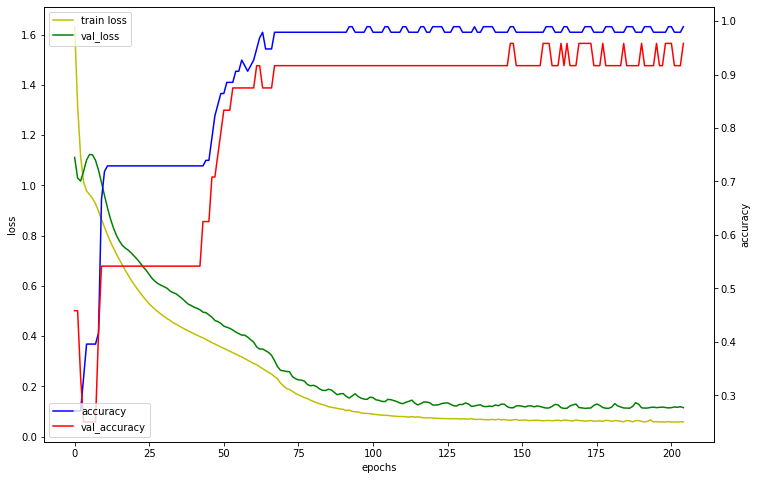

In [7]:
# 5. 모델 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [8]:
# 5. 모델 평가하기
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 17ms/step - loss: 0.0450 - accuracy: 1.0000


[0.045032430440187454, 1.0]

In [11]:
# from tensorflow.keras.models import load_model
# model2 = load_model('./model/iris-147-val0.9583.h5')
# 6. 사용하기(예측)
model.predict(np.array([[5.1, 3.5, 1.4, 0.2]])).argmax()

0

In [12]:
model.predict_classes(np.array([[5.1, 3.5, 1.4, 0.2]]))

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0], dtype=int64)

In [15]:
# test 데이터의 accuracy 진짜 100%
# real = test_Y.argmax(axis=1)
real = np.argmax(test_Y, axis=1)
real

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

In [18]:
pred = model.predict_classes(test_X)
np.all(real == pred)

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


True

In [20]:
cross_tab = pd.crosstab(real, pred)
cross_tab.index.name = 'real'
cross_tab.columns.name = 'pred'
cross_tab

pred,0,1,2
real,,,
0,11,0,0
1,0,13,0
2,0,0,6
